In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import scipy as sp
import pandas as pd
import scienceplots
import functions

plt.style.use('science')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import os
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
print(os.getenv("PATH"))

/opt/anaconda3/bin:/opt/anaconda3/condabin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin


# Import Data

In [4]:
curr_data = pd.read_csv("data/cedric_3500G_50uA.csv", skiprows = 3, sep = '\t')
display(curr_data.head())
curr_data.columns

,Temperature (K),B-Field (Gauss),sample I AB,sample I AD,sample I AC,sample I BD,sample I -AB,sample I -AD,sample I -AC,sample I -BD,Voltage DC,Voltage BC,Voltage BD,Voltage AC,Voltage -DC,Voltage -BC,Voltage -BD,Voltage -AC,Unnamed: 18
0,96.040,-4223.000000,0.00005,0.00005,0.00005,0.00005,-0.00005,-0.00005,-0.00005,-0.00005,0.012898,0.016257,0.047411,0.042710,-0.012877,-0.016959,-0.048636,-0.043444,NaN
1,97.345,-33.490002,0.00005,0.00005,0.00005,0.00005,-0.00005,-0.00005,-0.00005,-0.00005,0.009069,0.010362,0.001450,-0.001538,-0.009081,-0.010964,-0.002479,0.000795,NaN
2,98.625,4208.000000,0.00005,0.00005,0.00005,0.00005,-0.00005,-0.00005,-0.00005,-0.00005,0.013804,0.014855,-0.043328,-0.048371,-0.013773,-0.015443,0.042318,0.047604,NaN
3,100.155,-4222.000000,0.00005,0.00005,0.00005,0.00005,-0.00005,-0.00005,-0.00005,-0.00005,0.013803,0.017362,0.047784,0.042730,-0.013793,-0.018056,-0.048988,-0.043444,NaN
4,101.495,-33.299999,0.00005,0.00005,0.00005,0.00005,-0.00005,-0.00005,-0.00005,-0.00005,0.009793,0.011228,0.001589,-0.001664,-0.009823,-0.011838,-0.002612,0.000931,NaN


Index(['Temperature (K)', 'B-Field (Gauss)', 'sample I AB', 'sample I AD',
       'sample I AC', 'sample I BD', 'sample I -AB', 'sample I -AD',
       'sample I -AC', 'sample I -BD', 'Voltage DC', 'Voltage BC',
       'Voltage BD', 'Voltage AC', 'Voltage -DC', 'Voltage -BC', 'Voltage -BD',
       'Voltage -AC', 'Unnamed: 18'],
      dtype='object')

# Full Compute

## To-Do:

3. In the resistivity plot, find where sample is in extrinsic and intrinsic regions.
4. Hole concentration in extrinsic region
5. Hole mobilities in extrinsic region
6. Compare resistance measured for sample in zero field with the magnetoresistance
7. Comparison between different data sets.

269.0812647540425 269.1562094309945
Hall Coefficient: Room Temp Pos =  -0.1255917600763177  Temp =  293.2
Hall Coefficient: Room Temp Neg =  -0.10255187216789889  Temp =  295.0
Resistivity: Room Temp Pos =  1.0628660779328891  Temp =  293.2
Resistivity: Room Temp Neg =  0.9640588208373441  Temp =  295.0


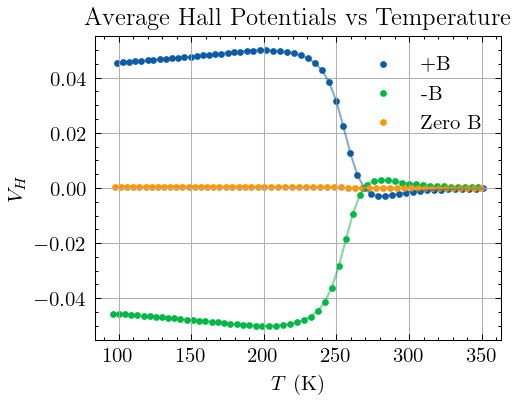

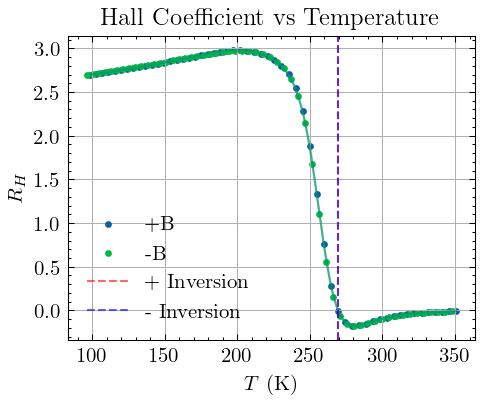

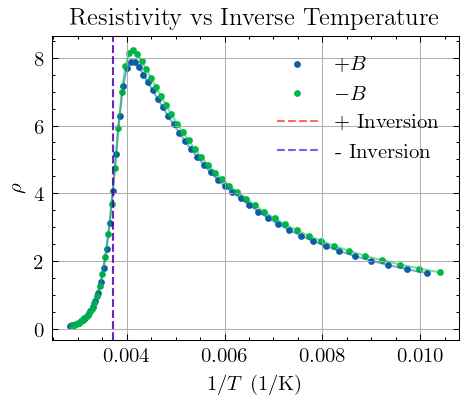

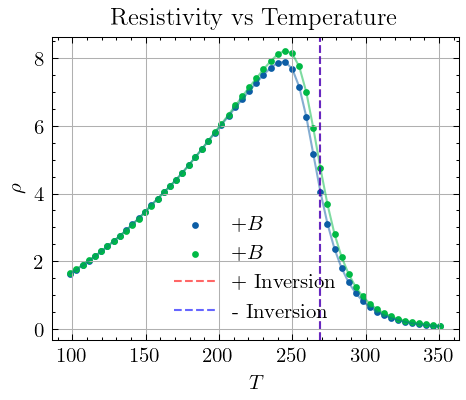

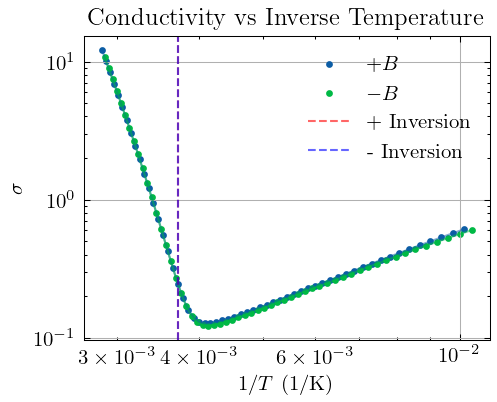

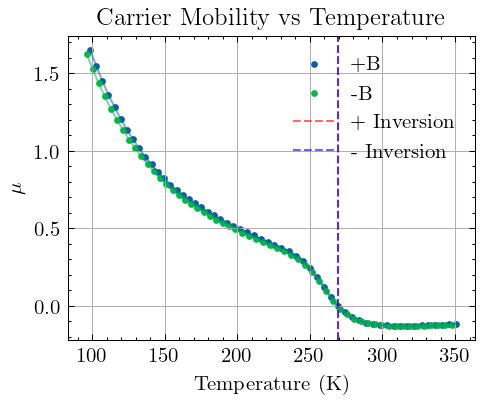

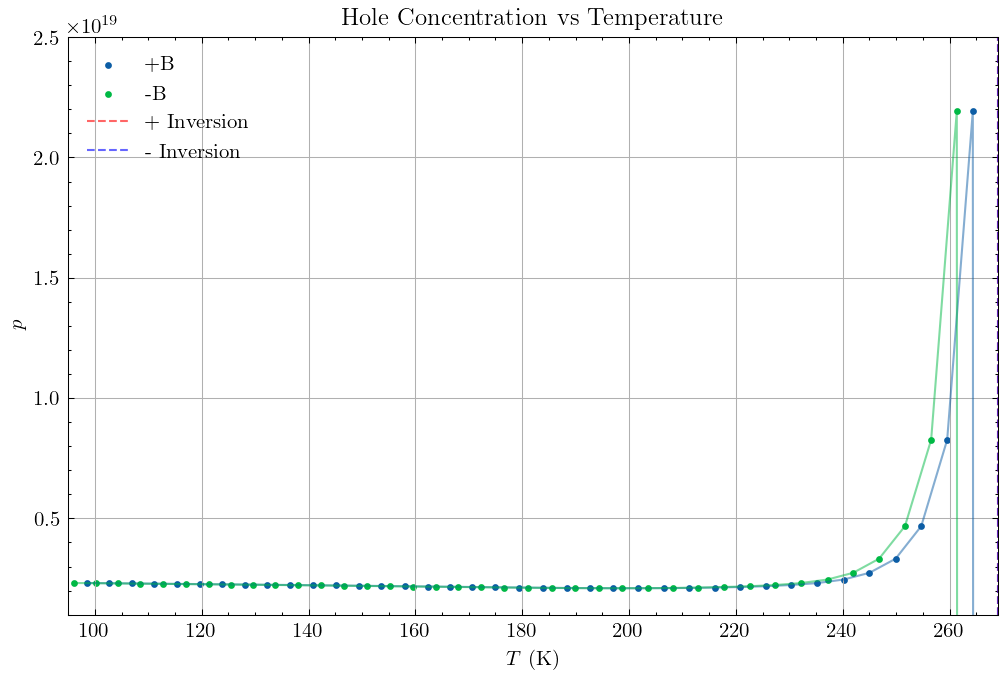

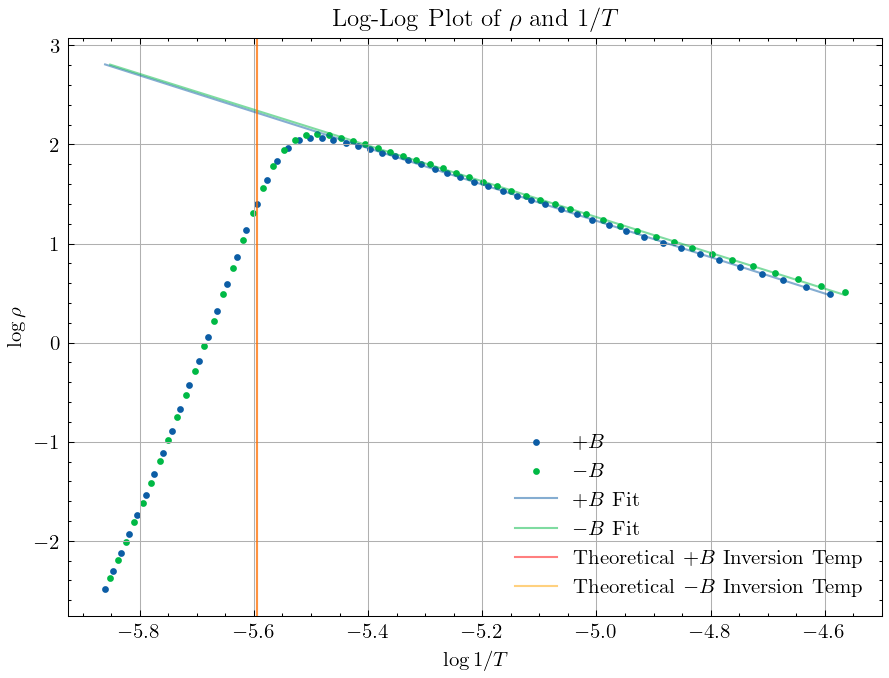

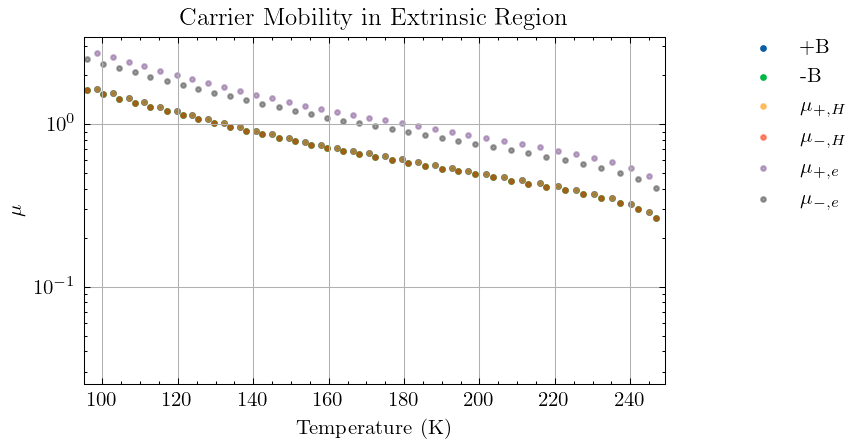

In [29]:
functions.gen_data_plots(curr_data)

Note we have to look at the 3 data points, +B, 0-Field, and -B. We can see in the above, we have to skip every 3 points to extract each.

In [10]:
Negative_B = curr_data.iloc[::3, :].reset_index()
Zero_B = curr_data.drop(0).iloc[::3, :].reset_index()
Positive_B = curr_data.drop([0, 1]).iloc[::3, :].reset_index()

43

# Trans-Resistances

In [41]:
# Negative B Field
R_ABDC_NegB = Negative_B["Voltage DC"] / Negative_B["sample I AB"]
R_ADBC_NegB = Negative_B["Voltage BC"] / Negative_B["sample I AD"]

# Zero-Field
R_ABDC_ZeroB = Zero_B["Voltage DC"] / Zero_B["sample I AB"]
R_ABDC_ZeroB = Zero_B["Voltage BC"] / Zero_B["sample I AD"]

# Positive Field
R_ABDC_PosB = Positive_B["Voltage DC"] / Positive_B["sample I AB"]
R_ADBC_PosB = Positive_B["Voltage BC"] / Positive_B["sample I AD"]


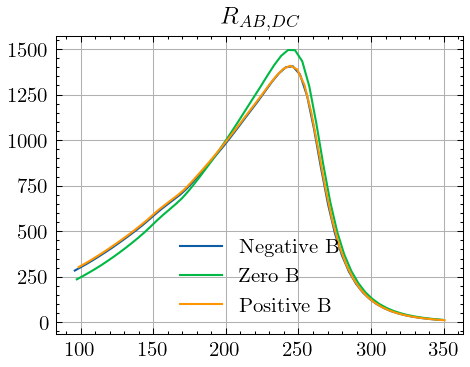

In [43]:
plt.figure(dpi = 150)
plt.title(r"$R_{AB, DC}$")
plt.plot(Negative_B["Temperature (K)"], R_ABDC_NegB, label = "Negative B")
plt.plot(Zero_B["Temperature (K)"], R_ABDC_ZeroB, label = "Zero B")
plt.plot(Positive_B["Temperature (K)"], R_ABDC_PosB, label = "Positive B")
plt.legend()
plt.grid()

In [16]:
# Zero field hysterisis

# Computing Resisitivity and Hall Coefficient

Hall Coefficient can be rewritten,

$$ R_H = \frac{-V_H d}{I_x B_z} $$

Where the Hall voltage is measured diagonally

**To do**:

1. Do averaging on what?

In [17]:
d = .00125

## Hall Coefficient

Temp =  292.6 Hall Coeff =  -0.03317284831193533


Text(0.5, 1.0, 'Hall Coefficient')

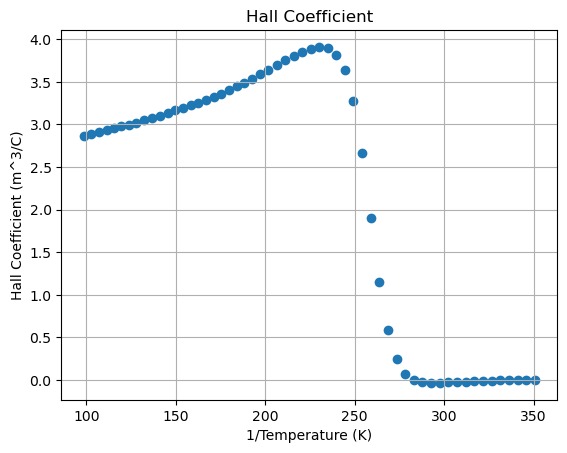

In [71]:
# Look at Voltage AC

B_Field_In_Tesla = Positive_B["B-Field (Gauss)"]/10000

Hall_Coefficient = -(Positive_B["Voltage AC"] * (d))/(Positive_B["sample I AC"] * B_Field_In_Tesla)
Hall_Coefficient[:5]

plt.scatter(Positive_B["Temperature (K)"], Hall_Coefficient)
plt.grid()

print("Temp = ", Positive_B["Temperature (K)"][43], "Hall Coeff = ", Hall_Coefficient[43])
plt.xlabel("1/Temperature (K)")
plt.ylabel("Hall Coefficient (m^3/C)")
plt.title("Hall Coefficient")

## Resistivity

Temp =  292.6 Resistivity =  1.107447786484676


Text(0.5, 1.0, 'Resistivity')

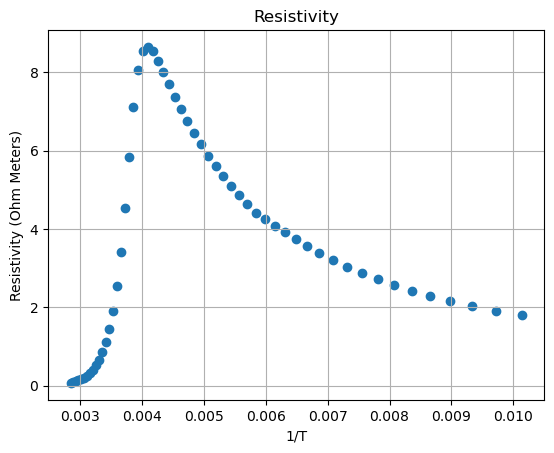

In [19]:
def resist_func(r1, r2):
    return (np.pi * d)/np.log(2) * (r1 + r2)/2 * 1 / np.cosh(np.log(r1/r2)/2.403)



rho = resist_func(R_ABDC_PosB, R_ADBC_PosB)

plt.scatter(1/Positive_B["Temperature (K)"], rho)
plt.grid()

print("Temp = ", Positive_B["Temperature (K)"][43], "Resistivity = ",  rho[43])
plt.xlabel("1/T")
plt.ylabel("Resistivity (Ohm Meters)")
plt.title("Resistivity")

## Conductivity

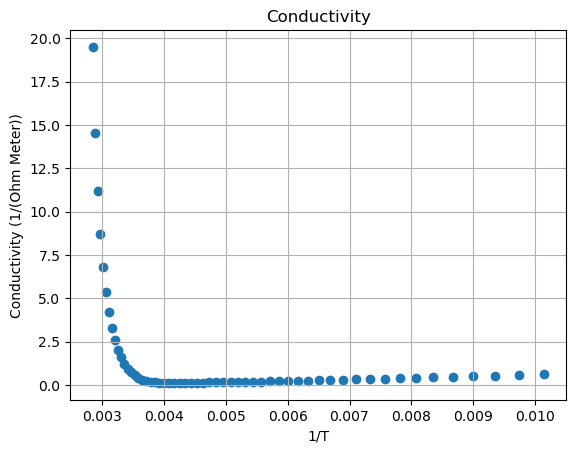

In [13]:
plt.scatter(1/Positive_B["Temperature (K)"], 1/rho)
plt.xlabel("1/T")
plt.ylabel("Conductivity (1/(Ohm Meter))")
plt.title("Conductivity")
plt.grid()

# Carrier Mobility and Concentration

# Hall Coefficient x Conductivity

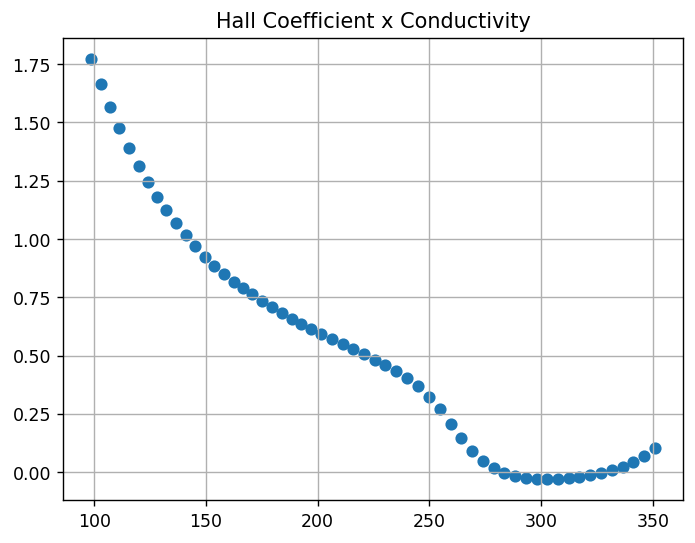

In [21]:
plt.figure(dpi = 150)
plt.title("Hall Coefficient x Conductivity")
plt.scatter(Positive_B["Temperature (K)"], Hall_Coefficient * 1/rho)
plt.grid()

# Electron or Hole Concentration

Since we have a p-type, we will look at the hole concentration which can be found,

$$ R_H = -\frac{1}{ep} $$

Which we can get,

$$ p = -\frac{1}{eR_H} $$

2.5784382241512485e+19


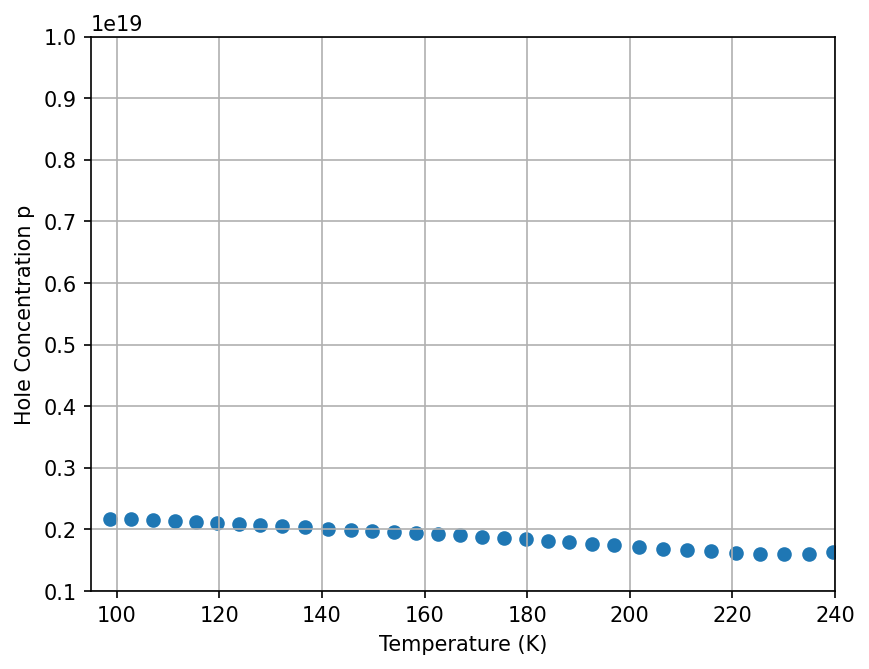

In [83]:
plt.figure(dpi = 150)

plt.scatter(Positive_B["Temperature (K)"], 1/(1.6*10**(-19) * Hall_Coefficient))

test = 1/(1.6*10**(-19) * Hall_Coefficient)

print(test[39])


# plt.yscale('log')
plt.ylim(10**(18), 10**(19))
plt.xlabel("Temperature (K)")
plt.ylabel("Hole Concentration p")
# plt.xscale('log')
plt.xlim(95, 240)
plt.grid()

# Hall Coefficient and Hall Mobility vs Temperature

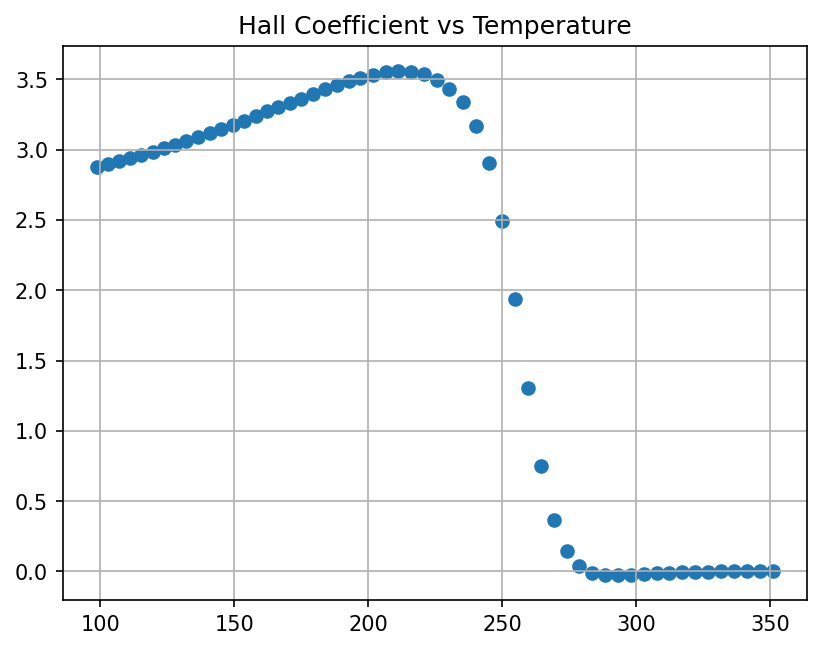

In [25]:
plt.figure(dpi = 150)
plt.title("Hall Coefficient vs Temperature")
plt.scatter(Positive_B["Temperature (K)"], Hall_Coefficient)
plt.grid()

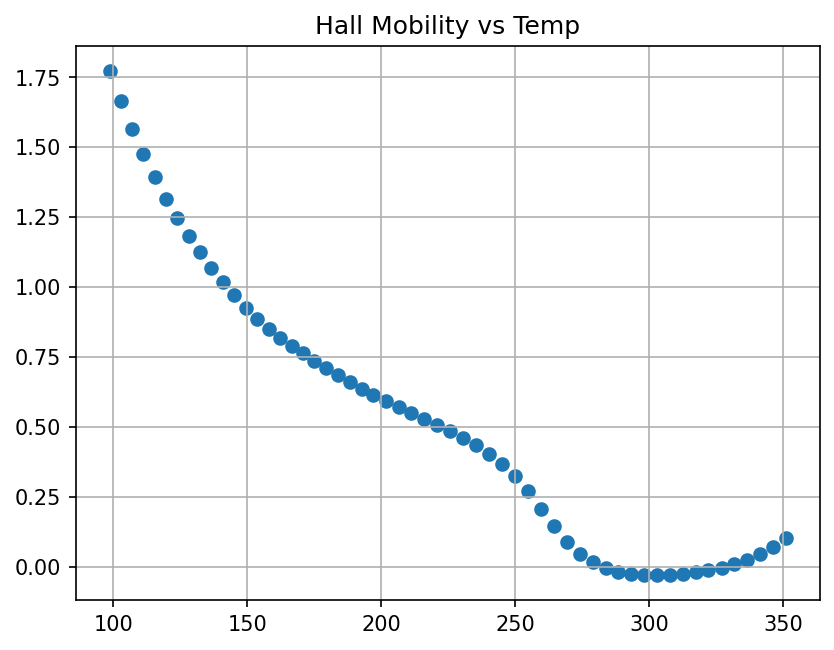

In [28]:
plt.figure(dpi = 150)
plt.title("Hall Mobility vs Temp")
plt.scatter(Positive_B["Temperature (K)"], Hall_Coefficient * 1/rho)
plt.grid()